# Construir uma √°rvore de decis√£o de classifica√ß√£o

Vamos ilustrar como a √°rvore de decis√£o ajusta os dados com uma classifica√ß√£o simples
problema ao usar o conjunto de dados de pinguins.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last"> Se voc√™ quiser uma vis√£o geral mais detalhada sobre este conjunto de dados, pode consultar o
Ap√™ndice - se√ß√£o de descri√ß√£o dos conjuntos de dados no final deste MOOC. </p>
</div>

In [1]:
import pandas as pd

penguins = pd.read_csv("penguins_classification.csv")

culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

In [2]:
penguins.head(3)

Culmen Length (mm)  Culmen Depth (mm) Species
0                39.1               18.7  Adelie
1                39.5               17.4  Adelie
2                40.3               18.0  Adelie

In [25]:
penguins['Species'].value_counts()

Adelie       151
Gentoo       123
Chinstrap     68
Name: Species, dtype: int64

Al√©m disso, dividimos os dados em dois subconjuntos para investigar como as √°rvores
prever valores com base em um conjunto de dados fora das amostras.

In [3]:
from sklearn.model_selection import train_test_split

data, target = penguins[culmen_columns], penguins[target_column]
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0)
range_features = {
    feature_name: (data[feature_name].min() - 1, data[feature_name].max() + 1)
    for feature_name in data.columns}

Em um notebook anterior, aprendemos que um classificador linear ir√° definir um
separa√ß√£o linear para dividir classes usando uma combina√ß√£o linear da entrada
recursos. Em nosso espa√ßo bidimensional, isso significa que um classificador linear ir√°
definir algumas linhas obl√≠quas que melhor separam nossas classes. N√≥s definimos um
fun√ß√£o abaixo disso, dado um conjunto de pontos de dados e um classificador, ir√° tra√ßar
os limites de decis√£o aprendidos pelo classificador.

In [4]:
import numpy as np
import matplotlib.pyplot as plt


def plot_decision_function(fitted_classifier, range_features, ax=None):
    """Plot the boundary of the decision function of a classifier."""
    from sklearn.preprocessing import LabelEncoder

    feature_names = list(range_features.keys())
    # create a grid to evaluate all possible samples
    plot_step = 0.02
    xx, yy = np.meshgrid(
        np.arange(*range_features[feature_names[0]], plot_step),
        np.arange(*range_features[feature_names[1]], plot_step),
    )

    # compute the associated prediction
    Z = fitted_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = LabelEncoder().fit_transform(Z)
    Z = Z.reshape(xx.shape)

    # make the plot of the boundary and the data samples
    if ax is None:
        _, ax = plt.subplots()
    ax.contourf(xx, yy, Z, alpha=0.4, cmap="RdBu")

    return ax

Assim, para um classificador linear, obteremos a seguinte decis√£o
limites. Essas linhas de limites indicam onde o modelo muda seu
previs√£o de uma aula para outra.

In [5]:
from sklearn.linear_model import LogisticRegression

linear_model = LogisticRegression()
linear_model.fit(data_train, target_train)

LogisticRegression()

In [6]:
import seaborn as sns

# create a palette to be used in the scatterplot
palette = ["tab:red", "tab:blue", "black"]

ax = sns.scatterplot(data=penguins, x=culmen_columns[0], y=culmen_columns[1],
                     hue=target_column, palette=palette)
plot_decision_function(linear_model, range_features, ax=ax)
# put the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
_ = plt.title("Decision boundary using a logistic regression")

Vemos que as linhas s√£o uma combina√ß√£o dos recursos de entrada, uma vez que s√£o
n√£o perpendicular a um eixo espec√≠fico. Na verdade, isso se deve ao modelo
parametriza√ß√£o que vimos no notebook anterior, controlada pelo
pesos e intercepta√ß√µes do modelo.

Al√©m disso, parece que o modelo linear seria um bom candidato para
problema, pois d√° uma boa precis√£o.

In [7]:
linear_model.fit(data_train, target_train)
test_score = linear_model.score(data_test, target_test)
print(f"Accuracy of the LogisticRegression: {test_score:.2f}")

Accuracy of the LogisticRegression: 0.98


Ao contr√°rio dos modelos lineares, as √°rvores de decis√£o s√£o modelos n√£o param√©tricos: eles n√£o s√£o
controlados por uma fun√ß√£o de decis√£o matem√°tica e n√£o t√™m pesos ou
interceptar para ser otimizado.

Na verdade, as √°rvores de decis√£o dividir√£o o espa√ßo considerando um √∫nico
recurso de cada vez. Vamos ilustrar esse comportamento tomando uma decis√£o
√°rvore faz uma √∫nica divis√£o para particionar o espa√ßo de recursos.

In [8]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=1)
tree.fit(data_train, target_train)

DecisionTreeClassifier(max_depth=1)

As parti√ß√µes encontradas pelo algoritmo separam os dados ao longo do eixo
"Culmen Depth", descartando o recurso "Culmen Length". Assim, destaca
que uma √°rvore de decis√£o n√£o usa uma combina√ß√£o de recursos ao fazer um
dividir. Podemos examinar mais a fundo a estrutura da √°rvore.

In [9]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(8, 6))
_ = plot_tree(tree, feature_names=culmen_columns,
              class_names=tree.classes_, impurity=False, ax=ax)

<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Tip</p>
<p class="last">Estamos usando a fun√ß√£o <tt class="docutils literal">fig, ax = <span class="pre">plt.subplots(figsize=(8,</span> 6))</tt> para criar uma figura e um eixo com tamanho espec√≠fico. Ent√£o, podemos passar o eixo para o
<tt class="docutils literal">sklearn.tree.plot_tree</tt> fun√ß√£o para que o desenho aconte√ßa neste eixo. </p>
</div>

Vemos que a divis√£o foi feita pelo recurso de profundidade do c√∫lmen. O original
conjunto de dados foi subdividido em 2 conjuntos com base na profundidade do c√∫lmen
(inferior ou superior a 16,45 mm).

Esta parti√ß√£o do conjunto de dados minimiza as diversidades de classes em cada
sub-parti√ß√µes. Essa medida tamb√©m √© conhecida como **crit√©rio**,
e √© um par√¢metro configur√°vel.

Se olharmos mais de perto para a parti√ß√£o, vemos que a amostra superior a
16,45 pertence principalmente √† classe Adelie. Olhando para os valores, n√≥s de fato
observe 103 indiv√≠duos Adelie neste espa√ßo. Tamb√©m contamos 52 Chinstrap
amostras e 6 amostras do Gentoo. Podemos fazer uma interpreta√ß√£o semelhante para o
parti√ß√£o definida por um limite inferior a 16,45 mm. Neste caso, a maioria
classe representada √© a esp√©cie Gentoo.

Vamos ver como nossa √°rvore funcionaria como um preditor. Vamos come√ßar a ver o
classe prevista quando a profundidade do c√∫lmen √© inferior ao limiar.

In [10]:
tree.predict([[0, 15]])

array(['Gentoo'], dtype=object)

A classe prevista √© o Gentoo. Agora podemos verificar se passamos por um culmen
profundidade superior ao limite.

Nesse caso, a √°rvore prediz a esp√©cie Adelie.

Assim, podemos concluir que um classificador de √°rvore de decis√£o ir√° prever a maioria
classe representada dentro de uma parti√ß√£o.

Durante o treinamento, temos uma contagem de amostras em cada parti√ß√£o, podemos
tamb√©m calcula a probabilidade de pertencer a uma classe espec√≠fica dentro deste
parti√ß√£o.

In [11]:
y_pred_proba = tree.predict_proba([[0, 17]])
y_proba_class_0 = pd.Series(y_pred_proba[0], index=tree.classes_)

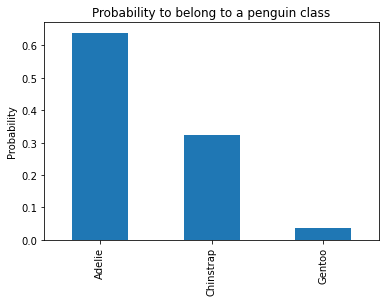

In [12]:
y_proba_class_0.plot.bar()
plt.ylabel("Probability")
_ = plt.title("Probability to belong to a penguin class")

Vamos calcular manualmente as diferentes probabilidades diretamente da √°rvore
estrutura.

In [13]:
adelie_proba = 103 / 161
chinstrap_proba = 52 / 161
gentoo_proba = 6 / 161
print(f"Probabilities for the different classes:\n"
      f"Adelie: {adelie_proba:.3f}\n"
      f"Chinstrap: {chinstrap_proba:.3f}\n"
      f"Gentoo: {gentoo_proba:.3f}\n")

Probabilities for the different classes:
Adelie: 0.640
Chinstrap: 0.323
Gentoo: 0.037



Tamb√©m √© importante notar que o comprimento do colmo foi desconsiderado para
o momento. Isso significa que qualquer que seja o valor fornecido, ele n√£o ser√° usado
durante a previs√£o.

In [14]:
tree.predict_proba([[10000, 17]])

array([[0.63975155, 0.32298137, 0.03726708]])

Voltando ao nosso problema de classifica√ß√£o, a divis√£o encontrada com um m√°ximo
profundidade de 1 n√£o √© poderosa o suficiente para separar as tr√™s esp√©cies e o modelo
a precis√£o √© baixa quando comparada ao modelo linear.

In [15]:
tree.fit(data_train, target_train)
test_score = tree.score(data_test, target_test)
print(f"Accuracy of the DecisionTreeClassifier: {test_score:.2f}")

Accuracy of the DecisionTreeClassifier: 0.78


Na verdade, n√£o √© uma surpresa. Vimos anteriormente que um √∫nico recurso n√£o
ser capaz de separar as tr√™s esp√©cies. No entanto, a partir da an√°lise anterior, n√≥s
vi que, usando os dois recursos, poder√≠amos obter resultados bastante bons.

No pr√≥ximo exerc√≠cio, voc√™ aumentar√° o tamanho da profundidade da √°rvore. Voc√™ ir√°
obtenha intui√ß√µes de como o particionamento do espa√ßo se repete ao longo do tempo.

# üìù Exerc√≠cio M5.01

No caderno anterior, mostramos como uma √°rvore com profundidade de 1 n√≠vel era
trabalhando. O objetivo deste exerc√≠cio √© repetir parte do anterior
experimente uma profundidade com 2 n√≠veis para mostrar como o processo de particionamento
√© repetido ao longo do tempo.

Antes de come√ßar, vamos:

* carregue o conjunto de dados;
* dividir o conjunto de dados em conjunto de dados de treinamento e teste;
* definir a fun√ß√£o para mostrar a fun√ß√£o de decis√£o de classifica√ß√£o.

In [17]:
import pandas as pd

penguins = pd.read_csv("penguins_classification.csv")

culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last"> Se voc√™ quiser uma vis√£o geral mais detalhada sobre este conjunto de dados, pode consultar o
Ap√™ndice - se√ß√£o de descri√ß√£o dos conjuntos de dados no final deste MOOC. </p>
</div>

In [29]:
from sklearn.model_selection import train_test_split

data, target = penguins[culmen_columns], penguins[target_column]
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0
)
range_features = {
    feature_name: (data[feature_name].min() - 1, data[feature_name].max() + 1)
    for feature_name in data.columns
}

In [20]:
import numpy as np
import matplotlib.pyplot as plt


def plot_decision_function(fitted_classifier, range_features, ax=None):
    """Plot the boundary of the decision function of a classifier."""
    from sklearn.preprocessing import LabelEncoder

    feature_names = list(range_features.keys())
    # create a grid to evaluate all possible samples
    plot_step = 0.02
    xx, yy = np.meshgrid(
        np.arange(*range_features[feature_names[0]], plot_step),
        np.arange(*range_features[feature_names[1]], plot_step),
    )

    # compute the associated prediction
    Z = fitted_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = LabelEncoder().fit_transform(Z)
    Z = Z.reshape(xx.shape)

    # make the plot of the boundary and the data samples
    if ax is None:
        _, ax = plt.subplots()
    ax.contourf(xx, yy, Z, alpha=0.4, cmap="RdBu")

    return ax

Crie um classificador de √°rvore de decis√£o com uma profundidade m√°xima de 2 n√≠veis e ajuste
os dados de treinamento. Uma vez que este classificador seja treinado, plote os dados e o
limite de decis√£o para ver o benef√≠cio de aumentar a profundidade.

In [35]:
# solution
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2)
tree.fit(data_train, target_train)

DecisionTreeClassifier(max_depth=2)

In [36]:
import seaborn as sns

palette = ["tab:red", "tab:blue", "black"]
ax = sns.scatterplot(data=penguins, x=culmen_columns[0], y=culmen_columns[1],
                     hue=target_column, palette=palette)
plot_decision_function(tree, range_features, ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
_ = plt.title("Decision boundary using a decision tree")

Utilizamos o recurso "Comprimento Culmen"?
Plote a √°rvore usando a fun√ß√£o `sklearn.tree.plot_tree` para descobrir!

In [37]:
# solution
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(16, 12))
_ = plot_tree(tree, feature_names=culmen_columns,
              class_names=tree.classes_, impurity=False, ax=ax)

Calcule a precis√£o da √°rvore de decis√£o nos dados de teste.

In [39]:
# solution
test_score = tree.fit(data_train, target_train).score(data_test, target_test)
print(f"Accuracy of the DecisionTreeClassifier: {test_score:.2f}")

Accuracy of the DecisionTreeClassifier: 0.97
